In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
pd.options.display.max_rows = 10
plt.style.use('fivethirtyeight')

In [30]:
headers = ['q' + str(c) for c in range(1,18)]
df = pd.DataFrame.from_csv('house-votes-84.data',index_col=None, header=None)
df.columns = headers
df[df=='y'] = 1.0
df[df=='n'] = 0.0
#df[df=='republican'] = 1.0
#df[df=='democrat'] = 0.0
for i in range(2,18):
    head = 'q' + str(i)
    df.loc[df[head]=='?',head] = df.loc[df[head]!='?',head].mean()
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,republican,0,1,0,1,1,1,0,0,0,1,0.362319,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0.812689
2,democrat,0.44208,1,1,0.417453,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0.504762,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0.423267,1,1,1,1


In [33]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
np.random.RandomState = 4444
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
binarizer = preprocessing.LabelBinarizer()
y_train = np.array([num[0] for num in binarizer.fit_transform(y_train)])
y_test = np.array([num[0] for num in binarizer.fit_transform(y_test)])

# Exercise 6.1:

Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
acc = accuracy_score(y_test,y_pred) 
prc = precision_score(y_test,y_pred) 
f1s = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
print('Accuracy:',acc)
print('Precision:',prc)
print('f1 Score:',f1s)
print('Recall:',rec)

Accuracy: 0.946564885496
Precision: 0.903225806452
f1 Score: 0.941176470588
Recall: 0.982456140351


K-Nearest Neighbour

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
acc = accuracy_score(y_test,y_pred) 
prc = precision_score(y_test,y_pred) 
f1s = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
print('Accuracy:',acc)
print('Precision:',prc)
print('f1 Score:',f1s)
print('Recall:',rec)

Accuracy: 0.954198473282
Precision: 0.918032786885
f1 Score: 0.949152542373
Recall: 0.982456140351


Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
acc = accuracy_score(y_test,y_pred) 
prc = precision_score(y_test,y_pred) 
f1s = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
print('Accuracy:',acc)
print('Precision:',prc)
print('f1 Score:',f1s)
print('Recall:',rec)

Accuracy: 0.946564885496
Precision: 0.903225806452
f1 Score: 0.941176470588
Recall: 0.982456140351


Support Vector Machine

In [40]:
from sklearn.svm import SVC
model = SVC()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
acc = accuracy_score(y_test,y_pred) 
prc = precision_score(y_test,y_pred) 
f1s = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
print('Accuracy:',acc)
print('Precision:',prc)
print('f1 Score:',f1s)
print('Recall:',rec)

Accuracy: 0.93893129771
Precision: 0.888888888889
f1 Score: 0.933333333333
Recall: 0.982456140351


Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
acc = accuracy_score(y_test,y_pred) 
prc = precision_score(y_test,y_pred) 
f1s = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
print('Accuracy:',acc)
print('Precision:',prc)
print('f1 Score:',f1s)
print('Recall:',rec)

Accuracy: 0.946564885496
Precision: 0.916666666667
f1 Score: 0.940170940171
Recall: 0.964912280702


# Exercise 6.2

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

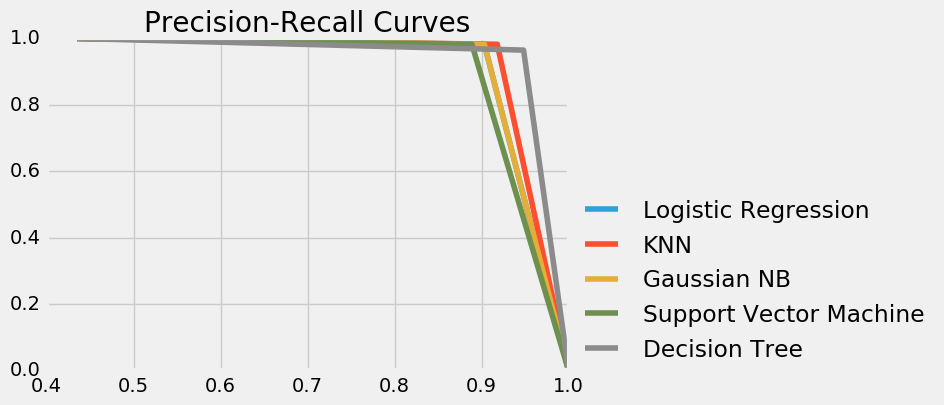

In [71]:
legendlist = []

model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(pre,rec)
legendlist.append('Logistic Regression')

model = KNeighborsClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(pre,rec)
legendlist.append('KNN')

model = GaussianNB()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(pre,rec)
legendlist.append('Gaussian NB')

model = SVC()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(pre,rec)
legendlist.append('Support Vector Machine')

model = DecisionTreeClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(pre,rec)
legendlist.append('Decision Tree')

plt.legend(legendlist,loc=[1,0])
plt.title('Precision-Recall Curves');

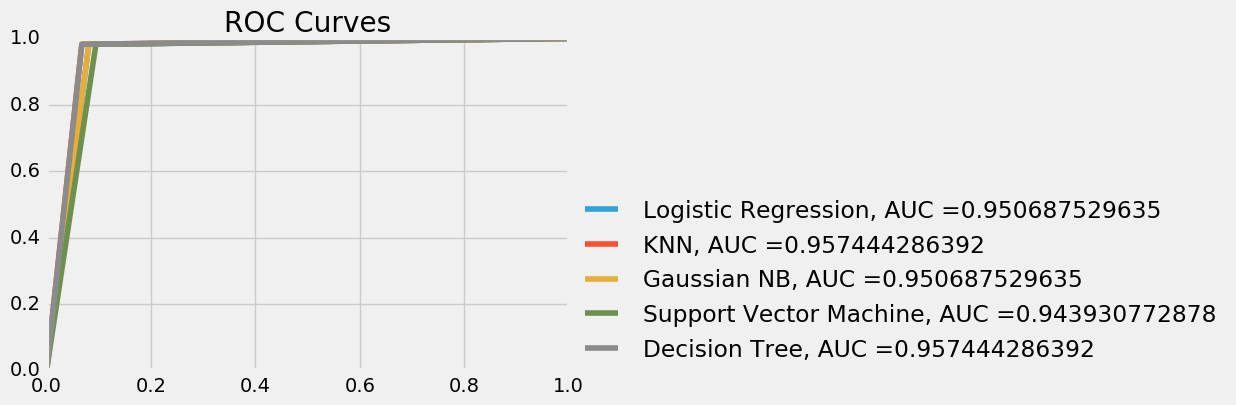

In [76]:
legendlist = []

model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = roc_curve(y_test, y_pred)
plt.plot(pre,rec)
AUC = auc(pre, rec)
legendlist.append('Logistic Regression, AUC ='+str(AUC))

model = KNeighborsClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = roc_curve(y_test, y_pred)
plt.plot(pre,rec)
AUC = auc(pre, rec)
legendlist.append('KNN, AUC ='+str(AUC))

model = GaussianNB()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = roc_curve(y_test, y_pred)
plt.plot(pre,rec)
AUC = auc(pre, rec)
legendlist.append('Gaussian NB, AUC ='+str(AUC))

model = SVC()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = roc_curve(y_test, y_pred)
plt.plot(pre,rec)
AUC = auc(pre, rec)
legendlist.append('Support Vector Machine, AUC ='+str(AUC))

model = DecisionTreeClassifier()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
pre, rec, thresholds = roc_curve(y_test, y_pred)
plt.plot(pre,rec)
AUC = auc(pre, rec)
legendlist.append('Decision Tree, AUC ='+str(AUC))

plt.legend(legendlist,loc=[1,0])
plt.title('ROC Curves');

# Exercise 6.3

In [73]:
headers = ['age','year','nodes','survival']
df = pd.DataFrame.from_csv('haberman.data',index_col=None, header=None)
df.columns = headers; df.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


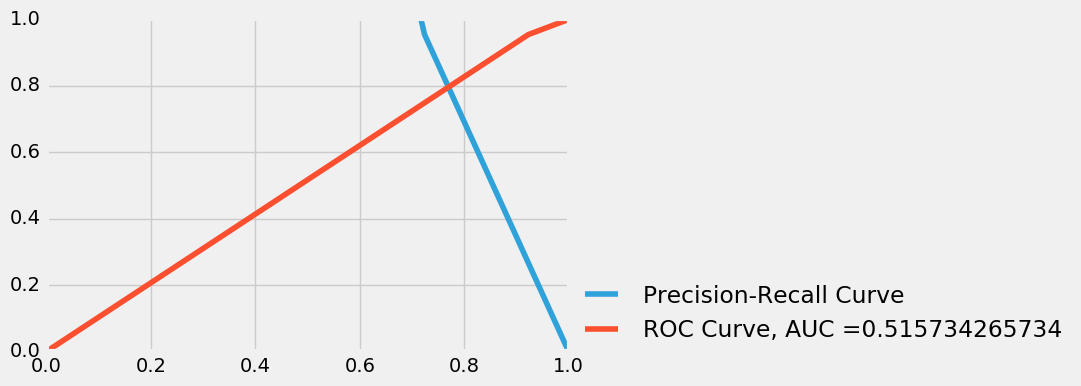

In [139]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

y_train = np.array([num[0] for num in binarizer.fit_transform(y_train)])
y_test = np.array([num[0] for num in binarizer.fit_transform(y_test)])

model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)

pre, rec, thresholds1 = precision_recall_curve(y_test, y_pred)

a, b, thresholds2 = roc_curve(y_test, y_pred)
AUC = auc(a, b)

plt.plot(pre,rec)
plt.plot(a,b)
plt.legend(['Precision-Recall Curve','ROC Curve, AUC =' + str(AUC)],loc=[1,0]);